In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 
sns.set()

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
training = pd.read_csv('train.csv', index_col=0)
testing = pd.read_csv('test.csv', index_col=0)

testing['Survived'] = np.NaN

In [4]:
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
training.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Some of the information above isn't really helpful.
# No one 38% survived.
# Things like survival and class aren't numbers we can average. They're categorical.
# Other things like Age and Fare can be averaged. They're numerical.
# Let's separate numerical and categorical data so we can get rid of some of the noise
numdata = training[['Age','SibSp','Parch','Fare']]
catdata = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [7]:
numdata.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [8]:
# So the average age on the Titanic was a little more than twenty-nine and a half.
# The youngest kid wasn't even a year old.
# And the oldest person was 80.
# Most people didn't have a sibling or spouse on board.
# But at least one person had eight siblings (or spouses, but hopefully siblings).
# All interesting data.
# Let's look at some more number-based data.
training [["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [9]:
# So the average age on the Titanic was a little higher for men than women.
training.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [10]:
# So women across the board paid more regardless of which class they were in.
# Which is interesting, though maybe not important for our goal
training ["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
# So most of the passengers did not have a spouse or sibling onboard
# Of those that did most only had one.
# There were five people who had five spouses or siblings - hopefully siblings.
training.groupby(["SibSp", "Pclass"])["Age"].mean()

SibSp  Pclass
0      1         39.181416
       2         31.934220
       3         27.630201
1      1         37.414154
       2         27.363636
       3         24.912698
2      1         37.200000
       2         19.125000
       3         18.875000
3      1         22.000000
       2         30.000000
       3          8.875000
4      3          7.055556
5      3         10.200000
8      3               NaN
Name: Age, dtype: float64

In [12]:
# So it looks like the average ages for people with no siblings or spouse onboard were older than those with.
# And there was no one in first or second class with more than three siblings or a sibling/spouse combo of more than three.
training ["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

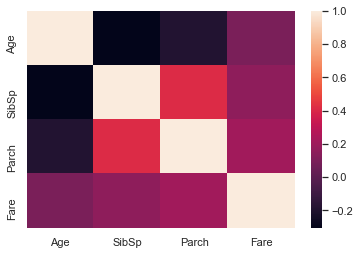

In [13]:
# So most people didn't have a parent or child onboard
print(numdata.corr())
sns.heatmap(numdata.corr())

In [14]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


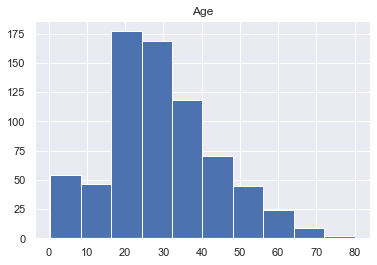

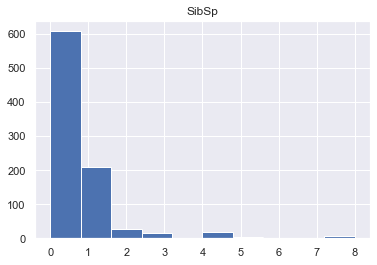

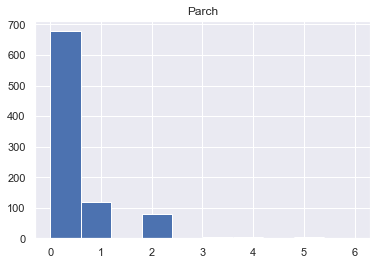

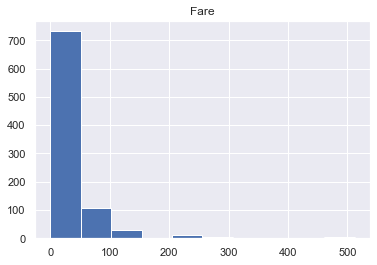

In [15]:
for i in numdata.columns:
    plt.hist(numdata[i])
    plt.title(i)
    plt.show()

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


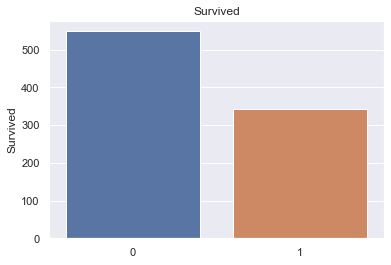

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


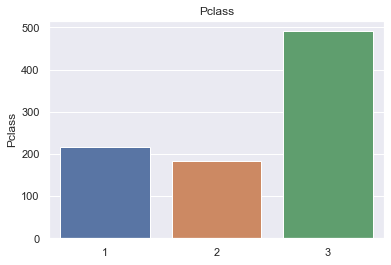

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


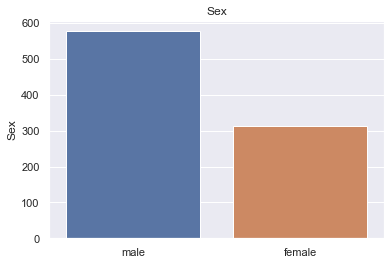

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


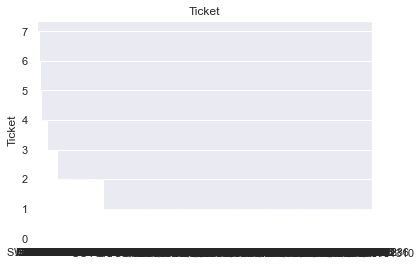

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


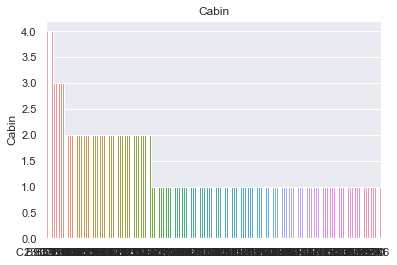

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


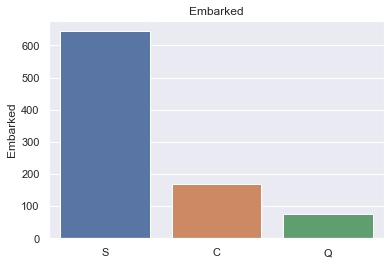

In [16]:
for i in catdata.columns:
    sns.barplot(catdata[i].value_counts().index,catdata[i].value_counts()).set_title(i)
    plt.show()

In [17]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))  
# this allows us to view pivot tables with  numeric values of who survived on the 3 criteria of ticket class, 
# gender and location of boarding the titanic
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [18]:
women = training.loc[training.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [47]:
firstclass = training.loc[training.Pclass == 1]["Survived"]
sum(firstclass)

136

In [19]:
men = training.loc[training.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [20]:
# This is ripped straight from Ken Jee's tutorial. https://www.kaggle.com/kenjee/titanic-project-example
# It has the desired effect of getting rid of the name (something we can't parse)
# And in turn making something parsable, ie Title.
training['Title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Capt              1
Jonkheer          1
Mme               1
the Countess      1
Sir               1
Ms                1
Don               1
Name: Title, dtype: int64

In [21]:
training['MultipleCabins'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['MultipleCabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: MultipleCabins, dtype: int64

In [22]:
training['CabinDeck'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.CabinDeck.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinDeck, dtype: int64


In [23]:
# This is mostly to see what the data is currently looking like.
# I like checking up on that just to make sure I'm not in for any surprises.
training [training ["Name"].str.contains("Lee")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MultipleCabins,CabinDeck
PassengerId,,,,,,,,,,,,,,
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,0,n
170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,0,n
554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,Mr,0,n


In [24]:
# Now I have to make sure that the testing data has the same columns
testing['MultipleCabins'] = testing.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
testing['MultipleCabins'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: MultipleCabins, dtype: int64

In [25]:
testing['Title'] = testing.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
testing['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [26]:
testing['CabinDeck'] = testing.Cabin.apply(lambda x: str(x)[0])
testing['CabinDeck'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: CabinDeck, dtype: int64

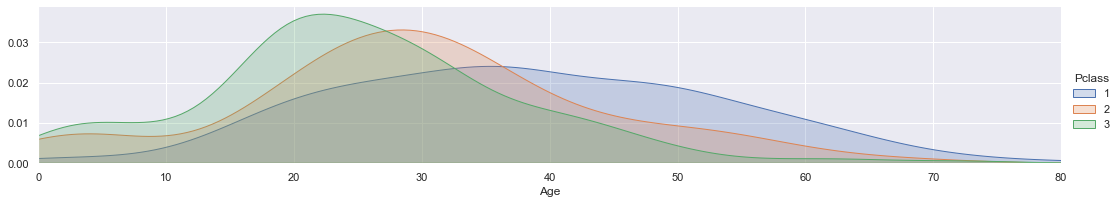

In [42]:
as_fig = sns.FacetGrid(training,hue='Pclass',aspect=5)

as_fig.map_dataframe(sns.kdeplot,'Age',shade=True)

oldest = training['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

In [ ]:
# Next it's time to fill in some missing values. 
# I could probably use the internet to search for some of the values for age.
# People have poured over this for years, I doubt there's anyone on this ship the internet doesn't know the age for.
# But we were given this data so let's stick with it.
training.Age = training.Age.fillna(training.Age.mean())

In [ ]:
# And then we do the same thing for the test data.
testing.Age = testing.Age.fillna(testing.Age.mean())

In [ ]:
# If we don't know where they got on they might not have, so let's go ahead and drop the NaNs in Embarked
training.dropna(subset=['Embarked'],inplace = True)

In [ ]:
# And testing...
testing.dropna(subset=['Embarked'], inplace = True)

In [ ]:
training.Pclass = training.Pclass.astype(str)

In [ ]:
testing.Pclass = testing.Pclass.astype(str)

In [ ]:
traindum = pd.get_dummies(training[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Title', 
                                    'MultipleCabins', 'CabinDeck']])

In [ ]:
testdum = pd.get_dummies(testing[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Title', 
                                  'MultipleCabins', 'CabinDeck']])

In [ ]:
testdum2 = testdum.reindex(labels=traindum.columns,axis=1)

In [ ]:
testdum2

In [ ]:
testdum2.rename(columns={'Title_the Countess': 'Title_the_Countess'}, inplace=True)

In [ ]:
testdum2['Title_Sir'] = testdum2['Title_Sir'].fillna("0")

In [ ]:
testdum2['Title_Mlle'] = testdum2['Title_Mlle'].fillna("0")

In [ ]:
testdum2['Title_Major'] = testdum2['Title_Major'].fillna("0")

In [ ]:
testdum2['Title_Mme'] = testdum2['Title_Mme'].fillna("0")

In [ ]:
testdum2['Title_Capt'] = testdum2['Title_Capt'].fillna("0")

In [ ]:
testdum2['Title_Lady'] = testdum2['Title_Lady'].fillna("0")

In [ ]:
testdum2['Title_Jonkheer'] = testdum2['Title_Jonkheer'].fillna("0")

In [ ]:
testdum2['Title_Don'] = testdum2['Title_Don'].fillna("0")

In [ ]:
testdum2['CabinDeck_T'] = testdum2['CabinDeck_T'].fillna("0")

In [ ]:
testdum2['Title_the_Countess'] = testdum2['Title_the_Countess'].fillna("0")

In [ ]:
y_train = training['Survived']
X_train = traindum 
X_test = testdum2

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[['Age','SibSp','Parch']]= scale.fit_transform(X_train_scaled[['Age','SibSp','Parch']])

In [ ]:
X_test_scaled = X_test.copy()
X_test_scaled[['Age','SibSp','Parch']]= scale.fit_transform(X_test_scaled[['Age','SibSp','Parch']])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [ ]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
# With median the results were, unscaled and scaled:
# gnb = 72.55% - 71.87%
# lr = 82.67% - 82.79%
# dt = 78.62% - 78.40%
# knn = 80.99% - 82.79%
# rf = 79.08% - 78.85%
# svc = 70.19% - 83.35%
# cv = 81.33% - 80.99%

# With the mean:
# gnb = 72.55% - 71.87%
# lr = 82.67% - 82.79%
# dt = 78.62% - 78.40%
# knn = 80.99% - 82.79%
# rf = 79.08% - 78.85%
# svc = 70.19% - 83.35%
# cv = 81.33% - 80.99%

In [ ]:
#Predictive analysis using Logistic Regression model
lr.fit(X_train,y_train)
#using features from test.csv(Class,Fare, Ticket etc...)
LR_Predicts=lr.predict(X_test)
#New dataset with predictions
LRoutput = pd.DataFrame({'Name': testing.Name, 'Survived': LR_Predicts})
# LRoutput.to_csv('TitanicSolutions2.csv', index=False)

In [ ]:
LRoutput

In [ ]:
dt.fit(X_train, y_train)
DT_Predicts=dt.predict(X_test)
DToutput = pd.DataFrame({'Name': testing.Name, 'Survived': DT_Predicts})
# DToutput.to_csv('TitanicSolutions2.csv', index=False)

In [ ]:
DToutput

In [ ]:
knn.fit(X_train, y_train)
KNPred=knn.predict(X_test)
KNNoutput = pd.DataFrame({"Name": testing.Name, 'Survived': KNPred})
# KNNoutput.to_csv('TitanicSolutions2.csv', index=False)

In [ ]:
KNNoutput

In [ ]:
rf.fit(X_train, y_train)
rfpred=rf.predict(X_test)
RFoutput=pd.DataFrame({'Name': testing.Name, 'Survived': rfpred})
# RFoutput.to_csv('TitanicSolutions3.csv', index=False)

In [ ]:
RFoutput

In [ ]:
svc.fit(X_train, y_train)
svcpred=svc.predict(X_test)
SVCoutput=pd.DataFrame({'Name': testing.Name, 'Survived': svcpred})
# SVCoutput.to_csv('TitanicSolutions2.csv', index=False)

In [ ]:
SVCoutput

In [ ]:
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'Name': testing.Name, 'Survived': y_hat_base_vc}
VOTEoutput = pd.DataFrame(data=basic_submission)
# VOTEoutput.to_csv('TitanicSolutions2.csv', index=False)

In [ ]:
VOTEoutput